In [5]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import bigrams, trigrams
from collections import Counter

In [6]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\atharv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\atharv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\atharv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\atharv\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [7]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df = df.iloc[:,:2]

In [8]:
df.columns = ['label','text']

In [9]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
stop_words = set(stopwords.words('english'))
lemmatizer = nltk.WordNetLemmatizer()

In [11]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\S*@\S*\s?', '', text)
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)


In [12]:
df['clean_text'] = df['text'].apply(preprocess_text)

In [13]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

In [14]:
df['tokenized_message'] = df['clean_text'].apply(word_tokenize)

In [15]:
df['tokenized_message'] = df['tokenized_message'].apply(lambda x: [word for word in x if word not in stop_words])

In [16]:
df

,label,text,clean_text,tokenized_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]"
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,nd time tried contact u u ã¥â£ pound prize cla...,"[nd, time, tried, contact, u, u, ã¥â£, pound, ..."
5568,ham,Will Ã_ b going to esplanade fr home?,ã b going esplanade fr home,"[ã, b, going, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood soany suggestion,"[pity, mood, soany, suggestion]"
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like id interested buying s...,"[guy, bitching, acted, like, id, interested, b..."


In [17]:
def get_most_common_ngrams(texts, n, ngram_range):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    ngrams = vectorizer.fit_transform(texts)
    sum_ngrams = ngrams.sum(axis=0)
    ngrams_freq = [(word, sum_ngrams[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    ngrams_freq = sorted(ngrams_freq, key=lambda x: x[1], reverse=True)
    return ngrams_freq[:n]


In [18]:
common_words_ham = get_most_common_ngrams(ham['clean_text'], 10, (1, 1))
common_words_spam = get_most_common_ngrams(spam['clean_text'], 10, (1, 1))

In [19]:
common_bigrams_ham = get_most_common_ngrams(ham['clean_text'], 10, (2, 2))
common_bigrams_spam = get_most_common_ngrams(spam['clean_text'], 10, (2, 2))

In [20]:
common_trigrams_ham = get_most_common_ngrams(ham['clean_text'], 10, (3, 3))
common_trigrams_spam = get_most_common_ngrams(spam['clean_text'], 10, (3, 3))

In [21]:
print("Common Words in Ham:", common_words_ham)
print("Common Words in Spam:", common_words_spam)
print("Common Bigrams in Ham:", common_bigrams_ham)
print("Common Bigrams in Spam:", common_bigrams_spam)
print("Common Trigrams in Ham:", common_trigrams_ham)
print("Common Trigrams in Spam:", common_trigrams_spam)

Common Words in Ham: [('im', 451), ('ltgt', 276), ('ok', 272), ('dont', 257), ('got', 244), ('come', 242), ('know', 241), ('ur', 240), ('ill', 236), ('like', 232)]
Common Words in Spam: [('free', 219), ('txt', 150), ('ur', 144), ('text', 138), ('mobile', 136), ('stop', 116), ('claim', 115), ('reply', 103), ('prize', 94), ('tone', 73)]
Common Bigrams in Ham: [('gon na', 58), ('ill later', 43), ('let know', 42), ('sorry ill', 39), ('dont know', 32), ('good morning', 31), ('new year', 30), ('wan na', 28), ('im going', 24), ('pls send', 22)]
Common Bigrams in Spam: [('po box', 28), ('customer service', 27), ('prize guaranteed', 22), ('send stop', 20), ('chance win', 19), ('selected receive', 19), ('await collection', 19), ('urgent mobile', 18), ('land line', 18), ('free text', 18)]
Common Trigrams in Ham: [('sorry ill later', 38), ('im gon na', 20), ('happy new year', 19), ('pls send message', 13), ('pick phone right', 12), ('phone right pls', 12), ('right pls send', 12), ('hi hi hi', 11),

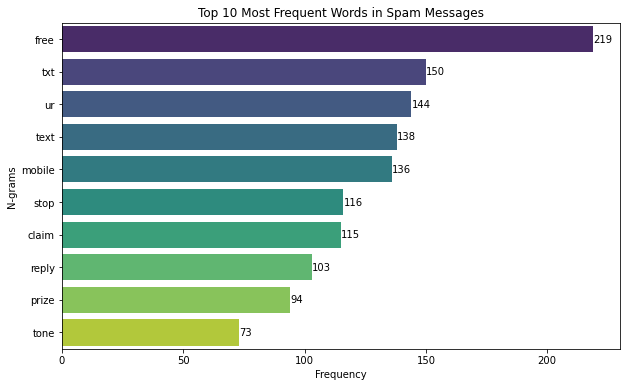

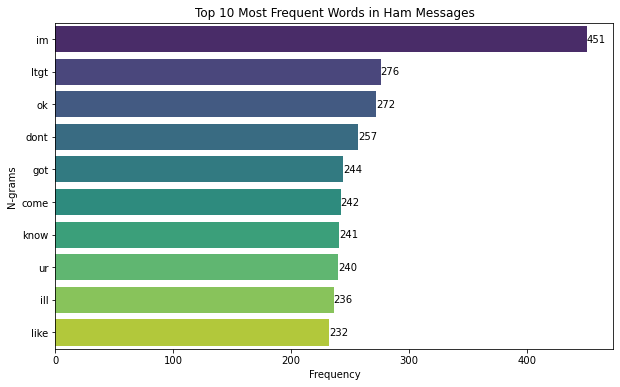

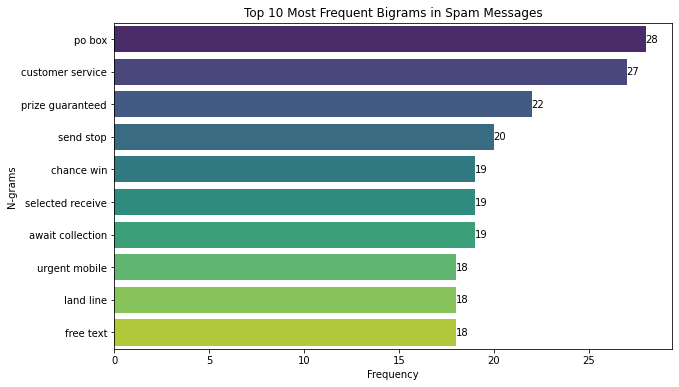

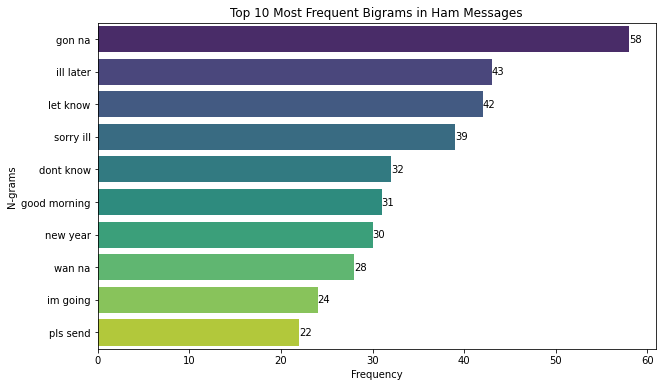

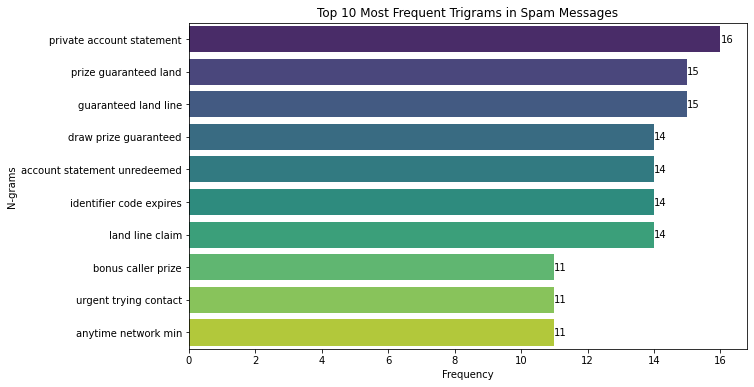

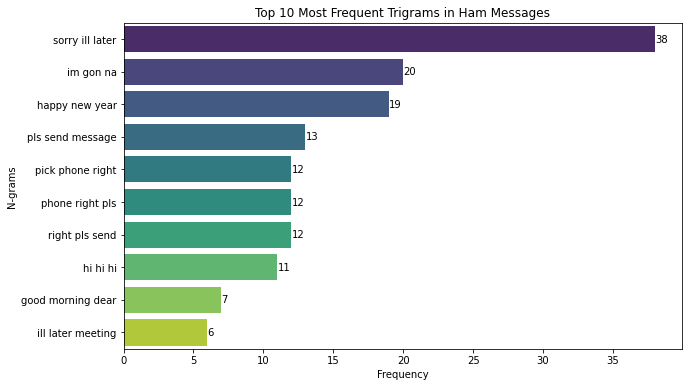

In [22]:
import seaborn as sns
def plot_top_ngrams(ngrams, title):
    words = [item[0] for item in ngrams]
    counts = [item[1] for item in ngrams]
    
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=counts, y=words, palette='viridis')
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('N-grams')
    
    # Add frequency values on top of the bars
    for index, value in enumerate(counts):
        ax.text(value, index, f'{value}', color='black', ha="left", va="center")
    
    plt.show()
    
# 10 most frequent words in each class
plot_top_ngrams(common_words_spam, 'Top 10 Most Frequent Words in Spam Messages')
plot_top_ngrams(common_words_ham, 'Top 10 Most Frequent Words in Ham Messages')

# 10 most frequent bigrams in each class
plot_top_ngrams(common_bigrams_spam, 'Top 10 Most Frequent Bigrams in Spam Messages')
plot_top_ngrams(common_bigrams_ham, 'Top 10 Most Frequent Bigrams in Ham Messages')

# 10 most frequent trigrams in each class
plot_top_ngrams(common_trigrams_spam, 'Top 10 Most Frequent Trigrams in Spam Messages')
plot_top_ngrams(common_trigrams_ham, 'Top 10 Most Frequent Trigrams in Ham Messages')

In [23]:
df

,label,text,clean_text,tokenized_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]"
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,nd time tried contact u u ã¥â£ pound prize cla...,"[nd, time, tried, contact, u, u, ã¥â£, pound, ..."
5568,ham,Will Ã_ b going to esplanade fr home?,ã b going esplanade fr home,"[ã, b, going, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood soany suggestion,"[pity, mood, soany, suggestion]"
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like id interested buying s...,"[guy, bitching, acted, like, id, interested, b..."


In [28]:
def generate_wordcloud(text, title):
    # Create a word cloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

# Example: Assuming `df` is your DataFrame with a 'label' and 'clean_text' column
# Generate word cloud for 'spam' label
generate_wordcloud(df[df['label'] == 'spam']['clean_text'], "Spam Word Cloud")

# Generate word cloud for 'ham' label
generate_wordcloud(df[df['label'] == 'ham']['clean_text'], "Ham Word Cloud")

ImportError: The _imagingft C module is not installed

In [27]:
!pip install wordcloud matplotlib


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
def generate_wordcloud(text,title):
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

generate_wordcloud(df[df['label']=='spam']['clean_text'], "Spam Word Cloud")
generate_wordcloud(df[df['label']=='ham']['clean_text'], "Ham Word Cloud")

ImportError: The _imagingft C module is not installed

In [29]:
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df['clean_text'])

In [30]:
y = df['label'].apply(lambda x: 1 if x == 'spam' else 0)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2,random_state=42)

In [34]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [35]:
y_pred = model.predict(X_test)
f1_bow = f1_score(y_test, y_pred)
print(f"F1 Score with Bag-of-Words: {f1_bow}")

F1 Score with Bag-of-Words: 0.89198606271777


In [36]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['clean_text'])

In [37]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [38]:
model_tfidf = DecisionTreeClassifier()
model_tfidf.fit(X_train_tfidf,y_train_tfidf)

DecisionTreeClassifier()

In [39]:
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)
f1_tfidf = f1_score(y_test_tfidf, y_pred_tfidf)
print(f"F1 Score with Tf-IDF: {f1_tfidf}")

F1 Score with Tf-IDF: 0.8543046357615894


In [40]:
def text_preprocessing(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove short words
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\W+', ' ', text)  # Remove punctuation and special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

In [41]:
df['preprocessed_message'] = df['text'].apply(text_preprocessing)


In [42]:
lemmatizer = nltk.WordNetLemmatizer()
nltk.download('wordnet')

def tokenize_and_lemmatize(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\atharv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [44]:
df['preprocessed_message'] = df['preprocessed_message'].apply(tokenize_and_lemmatize)


In [46]:
X_tfidf_preprocessed = tfidf_vectorizer.fit_transform(df['preprocessed_message'])
X_train_tfidf_preprocessed, X_test_tfidf_preprocessed, y_train_tfidf_preprocessed, y_test_tfidf_preprocessed = train_test_split(X_tfidf_preprocessed, y, test_size=0.2, random_state=42)

In [47]:
model_tfidf_preprocessed = DecisionTreeClassifier()
model_tfidf_preprocessed.fit(X_train_tfidf_preprocessed,y_train_tfidf_preprocessed)

DecisionTreeClassifier()

In [48]:
y_pred_tfidf_preprocessed = model_tfidf_preprocessed.predict(X_test_tfidf_preprocessed)
f1_tfidf_preprocessed = f1_score(y_test_tfidf_preprocessed, y_pred_tfidf_preprocessed)
print(f"F1 Score with Tf-IDF and Preprocessing: {f1_tfidf_preprocessed}")

F1 Score with Tf-IDF and Preprocessing: 0.8719723183391004


In [49]:
print("F1 Scores of Different Models:")
print(f"Bag-of-Words: {f1_bow}")
print(f"Tf-IDF: {f1_tfidf}")
print(f"Tf-IDF with Preprocessing: {f1_tfidf_preprocessed}")

F1 Scores of Different Models:
Bag-of-Words: 0.89198606271777
Tf-IDF: 0.8543046357615894
Tf-IDF with Preprocessing: 0.8719723183391004


In [ ]:
#TF-IDF worked the best however after preprocessing, the TF-IDF model did not perform as effectively in comparison to Bag-of-Words.